In [1]:
import pandas as pd
import numpy as np
from ggplot import *

In [2]:
BaseModel = pd.read_csv('xgb_0.95label.csv')
BaseModelAveraged = pd.read_csv('0.70.3TwoBestBaseModelTogether.csv')
TargetSQRM = pd.read_csv('Retesting3+xgb+additional+subsampled+average_price+0.95label.csv')
SubareaPrice = pd.read_csv('submission_20170530_avg_subarea_price.csv')
TSNE = pd.read_csv('xgb_0.95label_tsne_kremlin_others_param_tuning.csv')
AveragePrice = pd.read_csv('use_avg_price_by_full_sq_only_rub.csv')
PriceType = pd.read_csv('price_related_type_2.csv')

In [5]:
StackingThreeXGB31437 = pd.read_csv('Stacking_Gap_Best_SQRM_without_first_20%_data.csv')
Stacking31576 = pd.read_csv('Stacking_0628_FinalRounds.csv')
Stacking31638 = pd.read_csv('Stacking_3SKlearn_3xgb_correct.csv')
Stacking31724 = pd.read_csv('Stacking_xgb3_and_2_and_RF_corrected333.csv')
Stacking31819 = pd.read_csv('Stacking_xgb3_and_2_and_RF_corrected.csv')

In [46]:
submission_list = [TargetSQRM,SubareaPrice,TSNE,AveragePrice,PriceType]

In [47]:
def compare_sub(sub1,sub2=BaseModel):
    diff = sub1['price_doc'] - sub2['price_doc']
    tmp = pd.DataFrame({'id':sub1['id'],'diff':diff})
    g = ggplot(tmp,aes(x='id',y='diff'))+geom_line()+theme_bw()
    print(g)

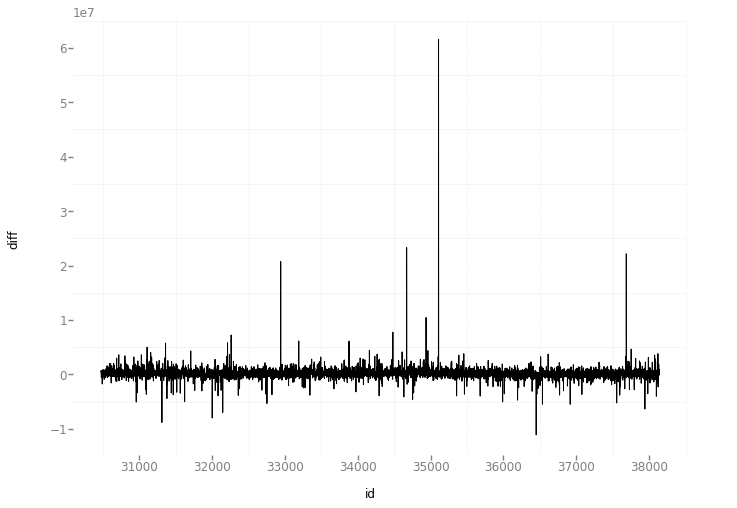

<ggplot: (-9223363257198317929)>


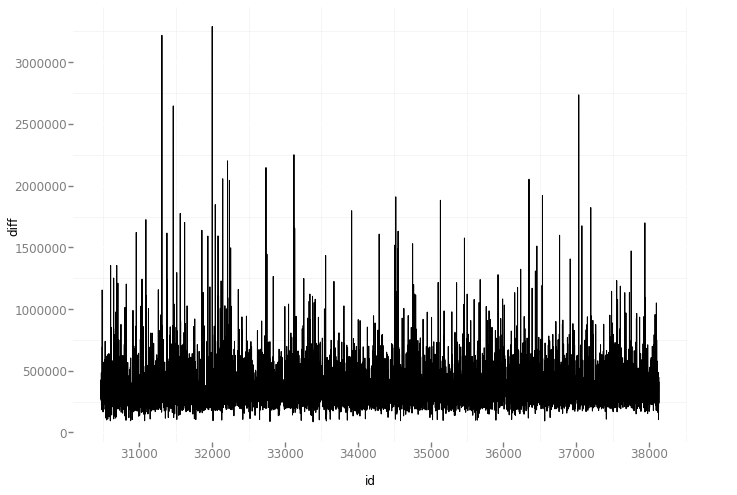

<ggplot: (-9223363257198317880)>


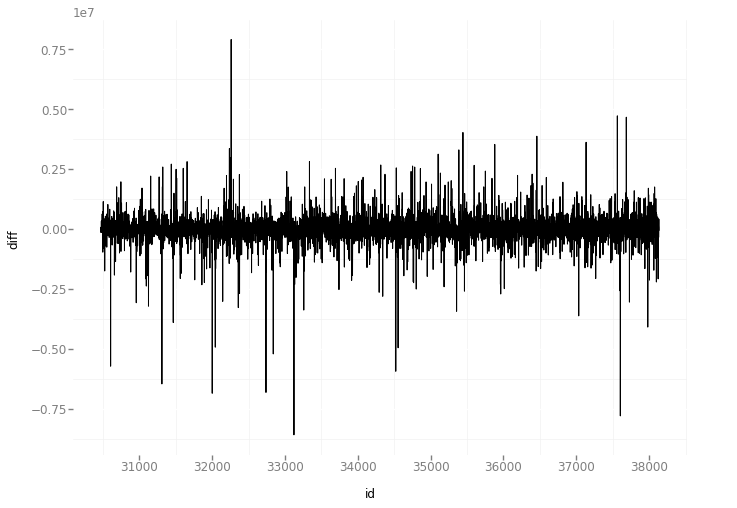

<ggplot: (8779656457178)>


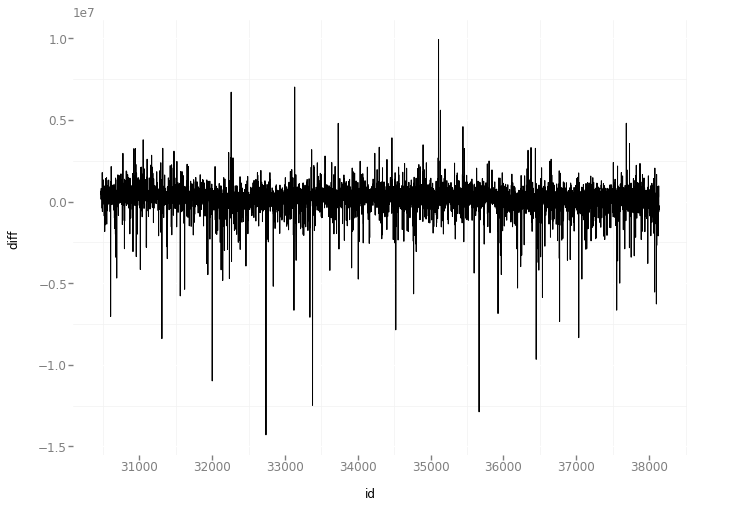

<ggplot: (-9223363257198310063)>


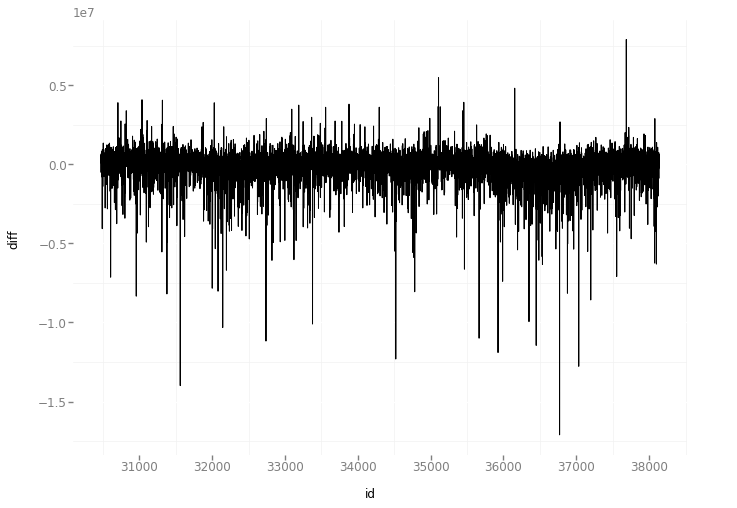

<ggplot: (-9223363257198299283)>


In [48]:
for each in submission_list:
    print('=='*50)
    compare_sub(each)

## Log Average Best Base and Price SQRM

In [49]:
Average_Base_SQRM = np.exp(0.5*np.log(BaseModel['price_doc'])+0.5*np.log(TargetSQRM['price_doc']))

In [50]:
sub1 = pd.DataFrame({'id':BaseModel['id'],'price_doc':Average_Base_SQRM})
sub1.to_csv('WeightedAverageBaseAndSQRM.csv',index=False)

## Log Average Sub1 and Sub Area Price

In [51]:
Average_Sub1_Subarea = np.exp(0.7*np.log(Average_Base_SQRM)+0.3*np.log(SubareaPrice['price_doc']))

In [52]:
sub2 = pd.DataFrame({'id':BaseModel['id'],'price_doc':Average_Sub1_Subarea})

In [53]:
sub2.to_csv('Rebuild_Yesterday_Model.csv',index=False)

## Log Average Current and Other Three

In [27]:
submission_list = [TSNE,AveragePrice,PriceType]

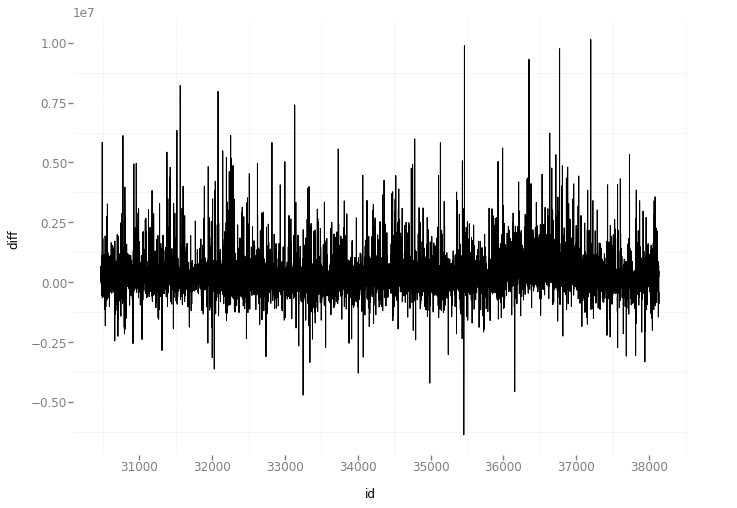

<ggplot: (-9223363257198359331)>


In [31]:
compare_sub(AveragePrice,PriceType)

In [32]:
Average_Others = np.exp(0.4*np.log(TSNE['price_doc'])+0.4*np.log(AveragePrice['price_doc'])+0.2*np.log(PriceType['price_doc']))

In [34]:
Average_Sub2_Others = np.exp(0.6*np.log(Average_Sub1_Subarea)+0.4*np.log(Average_Others))

In [37]:
sub3 = pd.DataFrame({'id':BaseModel['id'],'price_doc':Average_Sub2_Others})

In [42]:
sub3.to_csv('Average_All.csv',index=False)

## Average Everything?

In [3]:
BaseModel = pd.read_csv('xgb_0.95label.csv')
#BaseModelAveraged = pd.read_csv('0.70.3TwoBestBaseModelTogether.csv')
TargetSQRM = pd.read_csv('Retesting3+xgb+additional+subsampled+average_price+0.95label.csv')
SubareaPrice = pd.read_csv('submission_20170530_avg_subarea_price.csv')
TSNE = pd.read_csv('xgb_0.95label_tsne_kremlin_others_param_tuning.csv')
AveragePrice = pd.read_csv('use_avg_price_by_full_sq_only_rub.csv')
mistake1 = pd.read_csv('xgb+additional+subsampled+average_price+0.95label.csv')
mistake2 = pd.read_csv('xgb+additional+subsampled+low_average_price+0.95label.csv')
location1 = pd.read_csv('AddLocationAndFE.csv')
location2 = pd.read_csv('AddLocationNoFE.csv')
Gap = pd.read_csv('Test_UseGapAsTarget.csv')

In [5]:
CurrentBest = pd.read_csv('Log_Average_Best_Single_And_Gap_And_Area_Price.csv')
p0 = CurrentBest['price_doc']

In [6]:
p1=BaseModel['price_doc']
p2 = TargetSQRM['price_doc']
p3 = SubareaPrice['price_doc']
p4 = TSNE['price_doc']
p5 = AveragePrice['price_doc']
p6 = mistake1['price_doc']
p7=mistake2['price_doc']
p8=location1['price_doc']
p9=location2['price_doc']
p10=Gap['price_doc']

In [7]:
def compare_sub2(l1,l2):
    diff = l1-l2
    tmp = pd.DataFrame({'id':BaseModel['id'],'diff':diff})
    g = ggplot(tmp,aes(x='id',y='diff'))+geom_line()
    print(g)

In [10]:
AverageGapAndBest = np.exp(0.7*np.log(p0)+0.3*np.log(p10))

In [12]:
sub = pd.DataFrame({'id':BaseModel['id'],'price_doc':AverageGapAndBest})

In [15]:
sub.to_csv('Average_CurrentBest_And_Gap_Results.csv',index=False)

In [5]:
final = (p1+p2+p3+p4+p5+p6+p7+p8+p9+p10)/10

In [7]:
sub = pd.DataFrame({'id':BaseModel['id'],'price_doc':final})

In [9]:
sub.to_csv('Testing_Average_All_Reasonable_Results.csv',index=False)